# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [2]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [3]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [4]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [5]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


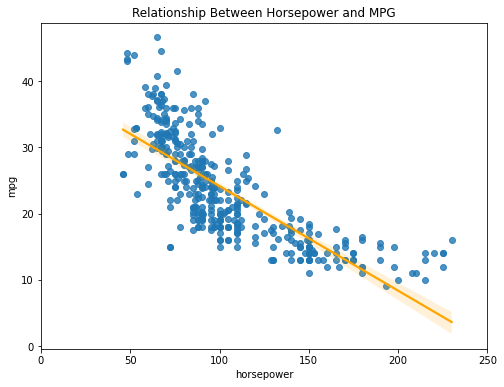

In [6]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- This is showing us the slope of the line that reduces the rss errors the most 
- this is gradient descent to help us pick the best slope


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)
'''
- takes continuously decreaseing step sizes to find the optimal slope, always moves toward the a low point to find a min
'''

'\n- takes continuously decreaseing step sizes to find the optimal slope, always moves toward the a low point to find a min\n'

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

#### Answer: 

- a step size is how for the gradient descent moves at any given time.
    - too large of a step size will mean that the mean could easily be overshot/never found
    - too small means that the program could take a long time to run/timeout

- gradient descent takes steps in smaller increments as it continues to search for the min. Does this through a proportion approach by taking a proportion of the derivative

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [ ]:
# call_on_students(1)

#### Answer: 

- Logistic regression is used for classifaction models
- it predicts the likelihood/probability that a value is part of a certain target class
- linear regression predicts continuous variables while log predicts classes
- it is parametric because it produces coefs that need interpretting


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

pros
- log regression is much harder to overfit than some other models
- more interpretable

cons
- another model might be more useful if there is no suspected linear relationship
- doesnt handle multicolinearity or imbalanced data well

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [8]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [9]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [10]:
y=mpg_class.pop('target')
X=mpg_class

In [11]:
# Train-test split
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42)

In [12]:
# Scale the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)


#### Part 1: explore the target column breakdown in train data

In [23]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

In [24]:
y_train.isna().sum()

0

#### Answer:

- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- It would predict all zeroes for our data as zero is the majority class.



#### Part 3: How accurate would that baseline be on test data?


In [ ]:
# Code to find the answer


#### Answer:


- would be accurate about 74.4% of the time



### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- There's a pretty sizeable class imbalance. We could use SMOTE to help oversample the underrepresented class


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [42]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42

# balanced class - NOT REALLY PART OF THIS REVIEW!!!!
logreg = LogisticRegression(random_state=42, class_weight='balanced').fit(X_train_scaled, y_train)

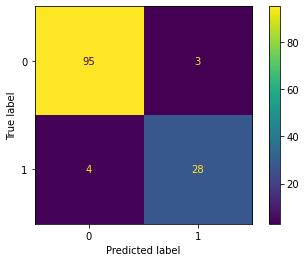

In [43]:
# Plot a confusion matrix on the test data

# balanced
plot_confusion_matrix(logreg, X_test_scaled, y_test);

In [46]:
# THIS IS CORRECT FOR THE REVIEW

# unbalanced
logreg = LogisticRegression(random_state=42).fit(X_train_scaled, y_train)

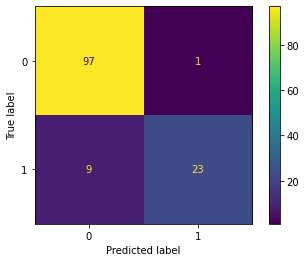

In [47]:
# unbalanced
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [54]:
tp=23
tn=97
fp=1
fn=9

In [49]:
# Accuracy
logreg.score(X_test_scaled,y_test)

0.9230769230769231

In [58]:
acc = (tp + tn) / (tp + tn + fp + fn)
acc

0.9230769230769231

Setting preds for easy access

In [50]:
preds = logreg.predict(X_test_scaled)

In [51]:
# Precision
precision_score(y_test, preds)

0.9583333333333334

In [57]:
prec = tp / (tp + fp)
prec

0.9583333333333334

In [52]:
# Recall
recall_score(y_test, preds)

0.71875

In [59]:
rec = tp / (tp + fn)
rec

0.71875

In [53]:
# F1-Score
f1_score(y_test, preds)

0.8214285714285714

In [60]:
f1_score_fake = 2*prec*rec / (prec + rec)
f1_score_fake

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [66]:
y_score1 = logreg.decision_function(X_test_scaled)

In [63]:
y_score = logreg.predict_proba(X_test_scaled)[:,1]

In [68]:
# y_score1, y_score

In [64]:
# Calculate roc-auc
y_score = logreg.predict_proba(X_test_scaled)[:,1]
# NOT PREDS!! NEED PROBA!!!
roc_auc_score(y_test,y_score)

0.9811862244897959

In [69]:
roc_auc_score(y_test,y_score1)

0.9811862244897959

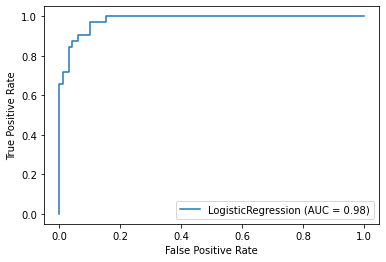

In [65]:
# Plot the ROC curve
plot_roc_curve(logreg,X_test_scaled,y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- not bad. accuracy and precision in the 90%+ range while recall and f1 are a little lower. Could possibly benefit from some hyperparameter tuning

- auc-roc levels are pretty good too


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [70]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

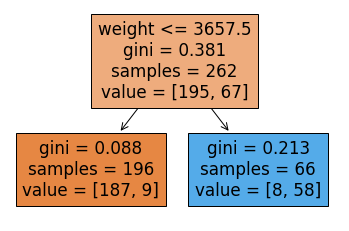

In [71]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

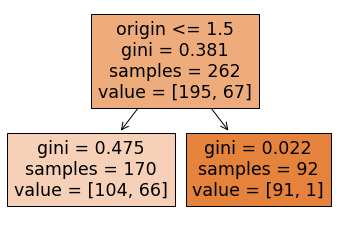

In [72]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- The one with weight because the overall gini scores are much lower and we can see that the values or more evenly split


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [73]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

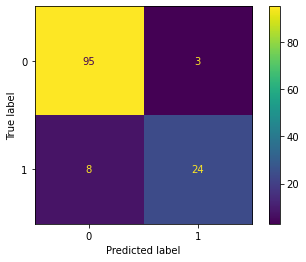

In [74]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

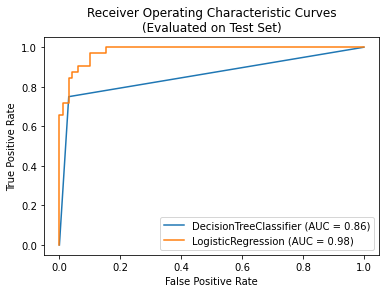

In [76]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Log reg absolutely. We want an ROC-AUC close to 1 and dt score is basically just a 50/50 guess. no better than a coinflip
